In [39]:
# Handwritten digit recognition experiment using the kNN Classification Algorithm
# Author @Jakub Chojdak
# github.com/jchojdak

In [40]:
# Import libraries
import pandas as pd
import numpy as np
import cv2
import requests

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [41]:
# Import data from scikit-learn "digits" dataset
digits = load_digits()
print(digits.data.shape)

(1797, 64)


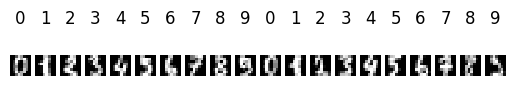

In [42]:
# Show first 20 numbers from dataset
fig, axes = plt.subplots(1, 20)

for i in range(20):
    axes[i].matshow(digits.images[i], cmap='gray')
    axes[i].title.set_text(digits.target[i])
    axes[i].axis('off')

plt.show()

Image loaded successfully.


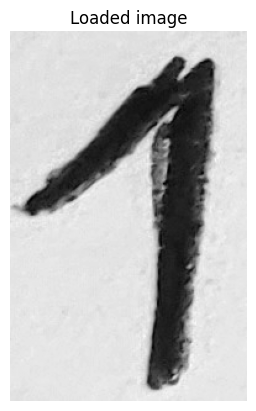

In [43]:
# Load image of my digit 1

## For local image
#image_path = 'my-digits/1.jpg'
#image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

## For image from GitHub repository
image_url = "https://raw.githubusercontent.com/jchojdak/machine-learning-experiments/refs/heads/master/ml-knn-digit-recognition/my-digits/1.jpg"
response = requests.get(image_url, stream=True)
response.raise_for_status()
image = np.asarray(bytearray(response.content), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)


if image is None:
    print("Failed to load the image.")
    exit()
else:
    print("Image loaded successfully.")
    plt.imshow(image, cmap='gray')
    plt.title('Loaded image')
    plt.axis('off')
    plt.show()

[[ 5  5  5  5  5  8  8  5]
 [ 5  5  5  8 14 15 14  5]
 [ 5  6 10 14 10 14 12  5]
 [ 8 12  9  5  7 15 11  5]
 [ 5  5  5  5  6 15  9  5]
 [ 5  5  5  5  6 16  7  5]
 [ 5  5  5  5  7 15  5  5]
 [ 5  5  5  5  7 10  5  5]]


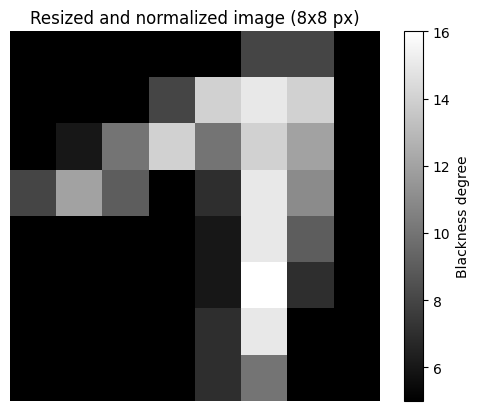

In [44]:
# Resize my image to 8x8 px
resized_image = cv2.resize(image, (8, 8), interpolation = cv2.INTER_AREA)

# If background is white and digit is black, reverse the color
resized_image = 255 - resized_image

# Normalize value of pixel to scale (0-16)
normalized_image = (resized_image / resized_image.max()*16).astype(int)

print(normalized_image)

plt.imshow(normalized_image, cmap='gray')
plt.title('Resized and normalized image (8x8 px)')
plt.colorbar(label="Blackness degree")
plt.axis('off')
plt.show()

In [45]:
# Convert image to the model format
input_image = resized_image.flatten().reshape(1, -1)
input_image_normalized = (input_image / 16)

print(input_image_normalized)

[[ 5.0625  5.0625  5.125   5.1875  5.25    7.5     7.625   5.0625  5.0625
   5.0625  5.125   7.4375 12.8125 13.5625 12.8125  5.      5.125   5.4375
   9.5    13.0625  9.125  13.1875 11.625   4.9375  7.1875 11.125   8.6875
   5.3125  6.375  13.6875  9.875   4.8125  4.9375  4.875   4.875   4.9375
   5.5    14.25    8.4375  4.8125  4.875   4.875   4.9375  4.9375  5.625
  14.3125  6.375   4.875   4.875   4.875   4.875   4.875   6.875  13.4375
   5.1875  4.8125  4.875   4.875   4.875   4.875   7.125   9.0625  4.8125
   4.8125]]


In [46]:
# Training model
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
# Predicte
prediction = model.predict(input_image_normalized)
print(f"Predicted digit: {prediction[0]}")

accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Predicted digit: 1
Accuracy: 0.9833333333333333
